# Análise dos Pares
Após identificar os pares em Cointegration.ipynb, é hora de analisar quais os melhores estão sinalizando entrada

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statistics
import matplotlib.pyplot as plt
%run Cointegration.py

# Funtions

In [3]:
def subshow(data, y_symbol, x_symbol, ax, period=250, title=''):
    y, x = getvalues_by_period(data[y_symbol], data[x_symbol], period)
    model= model_ols(y, x)
    result = zscore(model.resid)
    std = result.std()
    result.plot(ax=ax)
    #ax.plot(result)
    if(title == ''):
        ax.set_title('{} / {}'.format(y_symbol, x_symbol))
    else:
        ax.set_title(title)
    ax.margins(0.1)
    ax.set_xlabel('')

    ax.axhline(0, color='black',label='mean')
    ax.axhline(2*std, color='red', linestyle='--', linewidth=2)
    ax.axhline(-2*std, color='green', linestyle='--', linewidth=2)

In [4]:
path_data_cart = 'datasets/data_cart.csv'

In [5]:
data = pd.read_csv(path_data_cart, index_col=0)
pairs = pd.read_csv('datasets/cointegrated_pairs.csv')

print('{} to {}'.format(data.index[0], data.index[-1]))
print('data: {}'.format(data.shape))
print('pairs: {}'.format(pairs.shape))

11/04/2019 to 25/06/2020
data: (300, 71)
pairs: (309, 13)


Procura pares que estão quase no ponto de entrada 95% de distância da média e 5% próximo da zona -2 e +2

In [6]:
signal = pairs.loc[(pairs['Signal'] >= 1)].copy()
signal.reset_index(drop=True, inplace=True)
signal.shape

(21, 13)

In [7]:
signal = signal.loc[(signal['PeriodQt'] > 2)].sort_values(by=['HalfLife'], ascending=True).copy()
signal.reset_index(drop=True, inplace=True)
signal

,Period,Dependente,Independente,Dickey-Fuller,ADF,Beta,HalfLife,Hurst,Corr,Signal,SignalStr,PeriodQt,PeriodStr
0,250,CPFE3,ENGI11,0.000110,99,0.565238,5,0.222963,0.954954,1.230435,Long/Short,9,"100,120,140,160,180,200,220,240,250"
1,250,AZUL4,BBSE3,0.000638,99,3.649069,6,0.235455,0.960502,1.150709,Long/Short,9,"100,120,140,160,180,200,220,240,250"
2,250,CCRO3,LREN3,0.022936,95,0.296894,6,0.263365,0.936931,1.317102,Short/Long,8,"120,140,160,180,200,220,240,250"
3,250,CYRE3,LREN3,0.017950,95,0.793978,6,0.268593,0.964034,1.539623,Short/Long,7,"100,120,140,160,180,240,250"
4,250,B3SA3,BPAC11,0.038665,95,0.280677,8,0.342132,0.824397,1.070084,Short/Long,4,"100,200,240,250"
5,250,B3SA3,SBSP3,0.027074,95,0.494047,8,0.244627,0.815042,1.338566,Short/Long,3,"220,240,250"
6,250,LREN3,USIM5,0.034321,95,3.768021,8,0.301038,0.914920,1.000032,Long/Short,9,"100,120,140,160,180,200,220,240,250"
7,250,BRAP4,TAEE11,0.017302,95,2.040366,8,0.312501,0.809719,1.007975,Short/Long,6,"160,180,200,220,240,250"
8,250,RENT3,SBSP3,0.002740,99,0.837853,8,0.181899,0.898133,1.107450,Long/Short,9,"100,120,140,160,180,200,220,240,250"
9,250,IGTA3,USIM5,0.027852,95,4.342554,8,0.287463,0.935367,1.415268,Long/Short,4,"200,220,240,250"


In [7]:
#ignal.iloc[[0, 6, 11]].to_csv('datasets/oper/22062020.csv', index=False)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


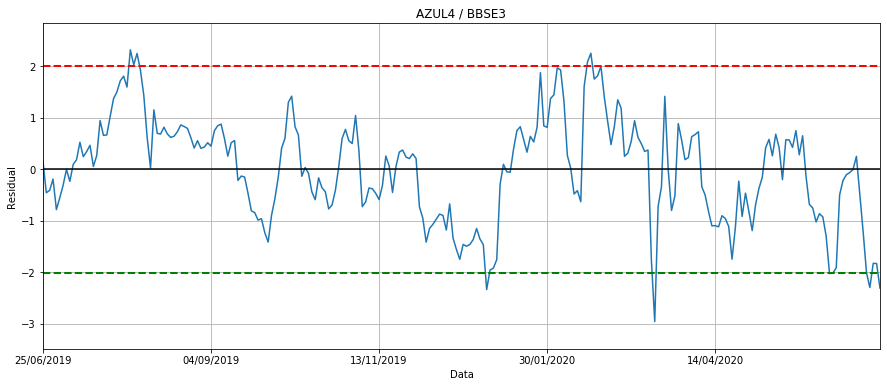

In [8]:
show(data, 'AZUL4', 'BBSE3')

### Plota todos os sinais

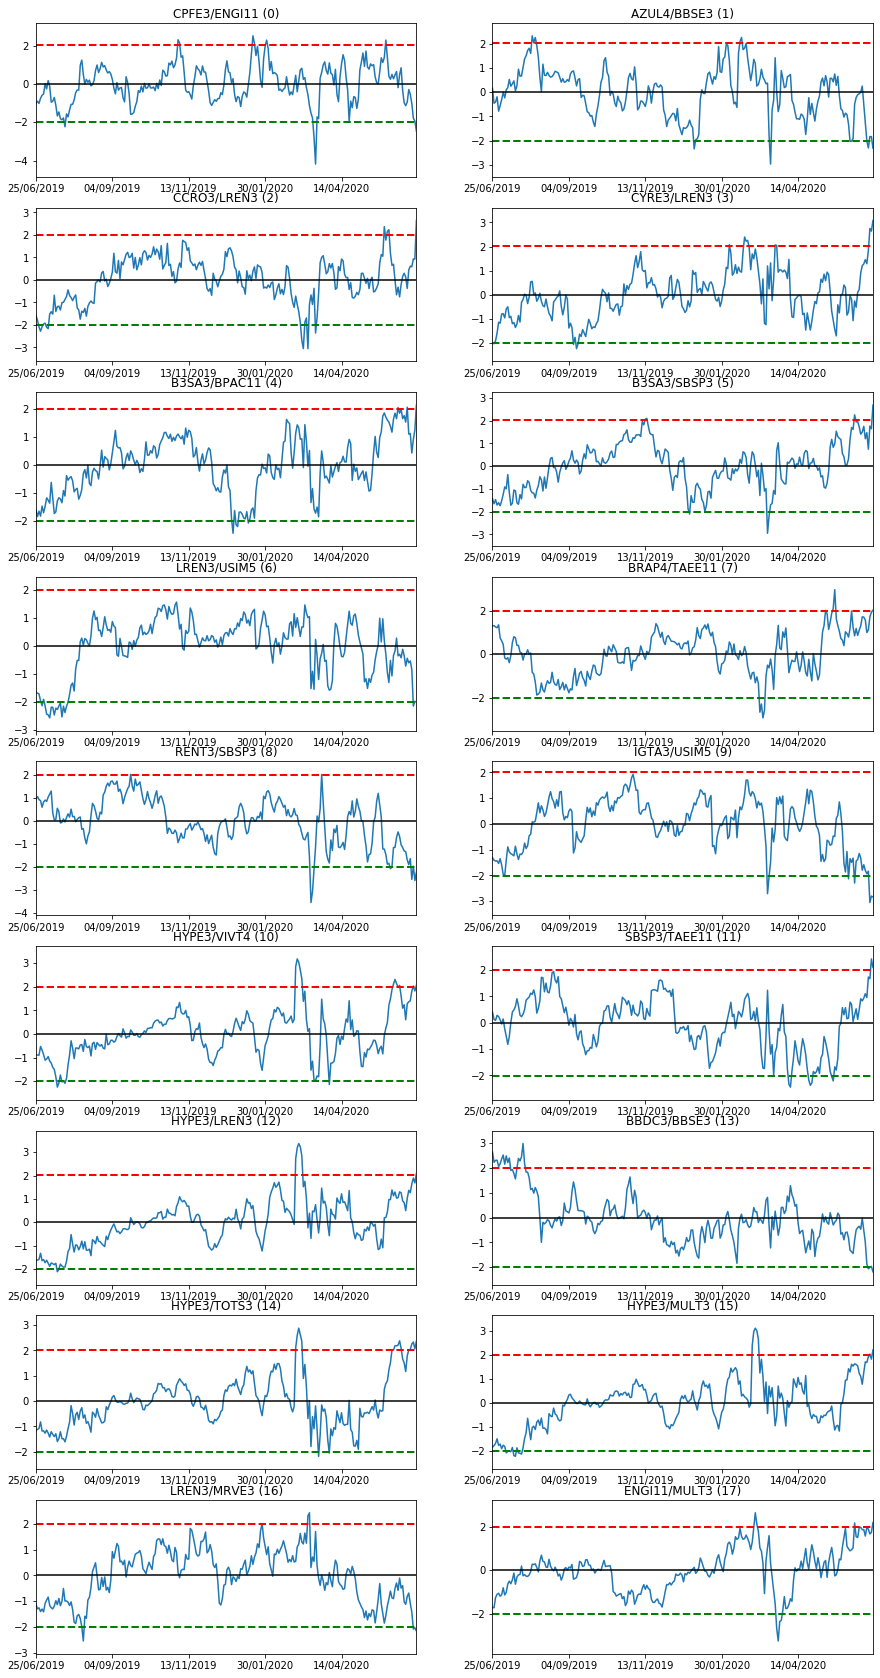

In [10]:
fig2, axes = plt.subplots(nrows=int((signal.shape[0]/2)), ncols=2, figsize=(15, 30))
for i, ax in enumerate(axes.flatten()):
    row = signal.iloc[i]
    y_symbol = row['Dependente']
    x_symbol = row['Independente']
    
    subshow(data, y_symbol, x_symbol, ax, title='{}/{} ({})'.format(y_symbol, x_symbol, i))
    #plt.tight_layout()

Visualiza todos os gráficos de df signal

#### Verifica movimento do par nos últimos 8 dias

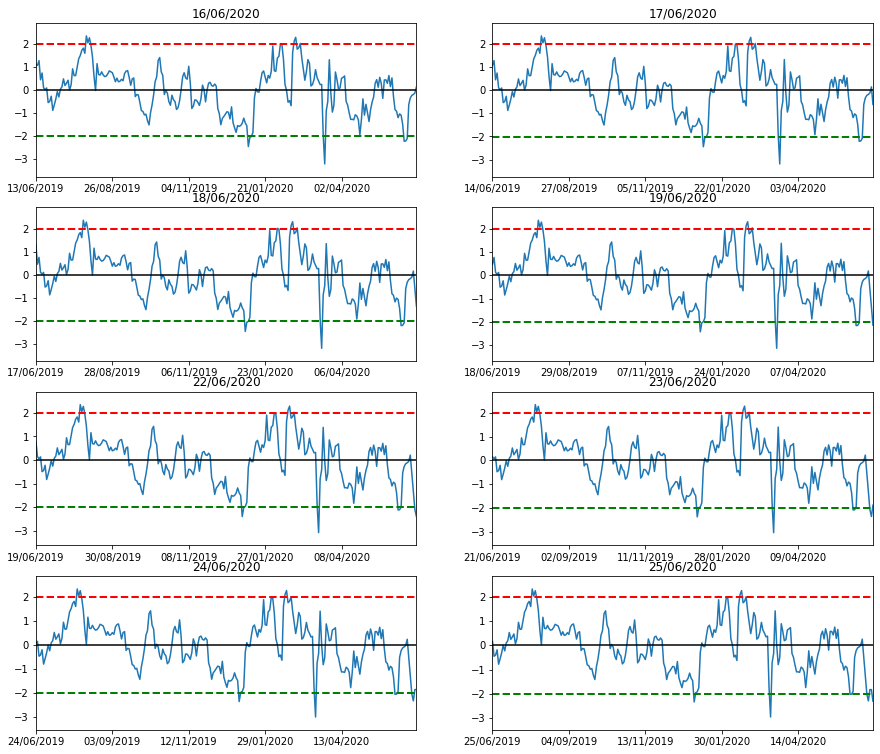

In [60]:
y_symbol = 'AZUL4'
x_symbol = 'BBSE3'

index = len(data)-8
fig2, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 13))
for i, ax in enumerate(axes.flatten()):
    index+=1
    last_data = data.iloc[:index].copy()
    label = last_data.index[-1]
    subshow(last_data, y_symbol, x_symbol, ax, title=label)
    #plt.tight_layout()

# Análise das operações abertas

In [35]:
oper_22062020 = pd.read_csv('datasets/oper/22062020.csv')
oper_22062020

,Period,Dependente,Independente,Dickey-Fuller,ADF,Beta,HalfLife,Hurst,Corr,Signal,SignalStr,PeriodQt,PeriodStr
0,250,AZUL4,BBSE3,0.000273,99,3.624776,5,0.239819,0.962281,1.066906,Long/Short,9,"100,120,140,160,180,200,220,240,250"
1,250,BBDC3,SANB11,0.019923,95,0.736223,8,0.297370,0.987493,1.004259,Long/Short,4,"200,220,240,250"
2,250,ENGI11,MULT3,0.027359,95,0.939998,11,0.399600,0.862502,1.045645,Short/Long,3,"220,240,250"


In [61]:
"""excel = data[293:][['AZUL4', 'BBSE3']].copy()
excel = excel.iloc[::-1]
excel[0:10].to_excel('datasets/test.xlsx')"""

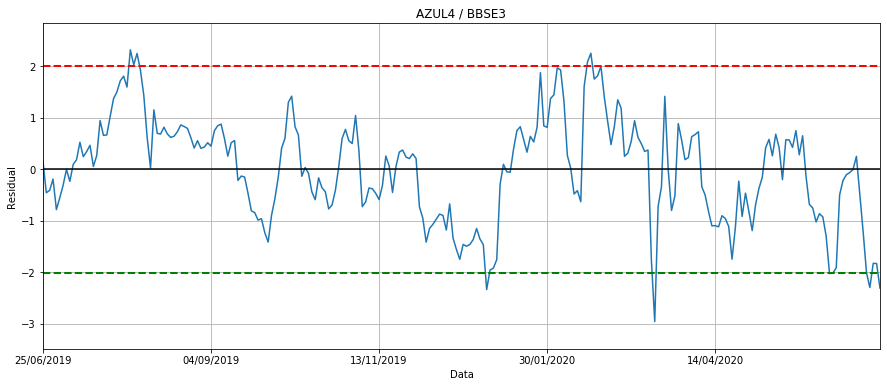

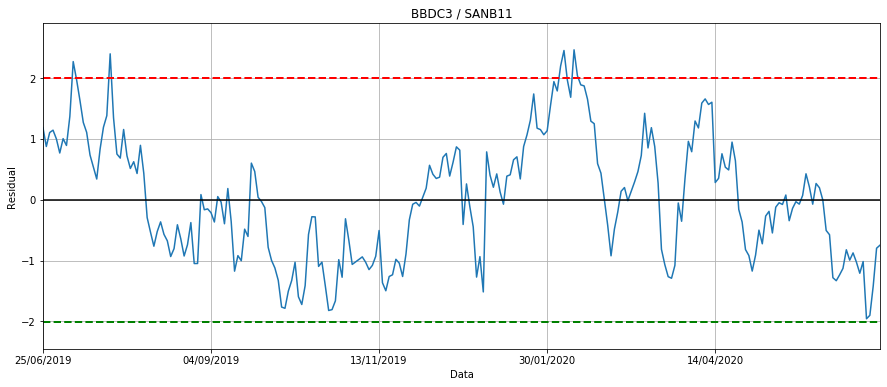

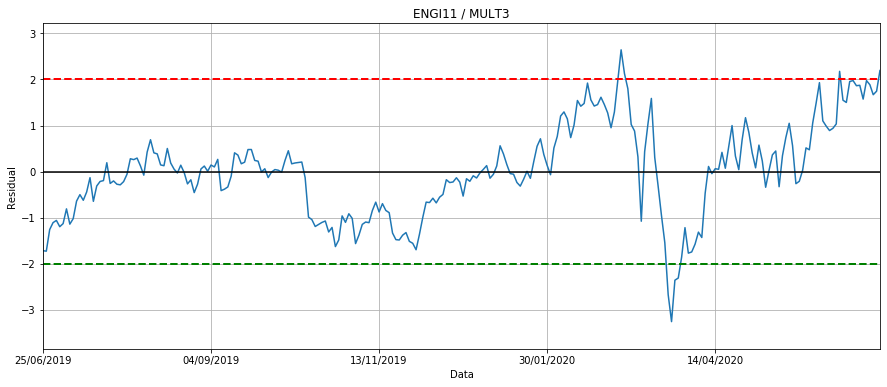

In [40]:
show(data, 'AZUL4', 'BBSE3')
show(data, 'BBDC3', 'SANB11')
show(data, 'ENGI11', 'MULT3')

In [102]:
result = model_ols(data['BBDC3'], data['SANB11'])
result.params

const    -1.082400
SANB11    0.732966
dtype: float64

In [105]:
result.resid[::-1][0:4]

Data
25/06/2020   -0.719513
24/06/2020   -0.770360
23/06/2020   -1.373842
22/06/2020   -1.845610
dtype: float64

In [106]:
dfres = pd.DataFrame()
dfres['resid'] = result.resid

In [107]:
dfres['mean'] = result.resid.rolling(window=21, center=False).mean()
dfres.fillna(value=0, inplace=True)

In [108]:
dfres['%'] = (dfres['mean'] / dfres['resid'])-1
dfres[284:]

,resid,mean,%
Data,,,
03/06/2020,-0.549458,-0.119726,-0.782102
04/06/2020,-1.239072,-0.144645,-0.883264
05/06/2020,-1.284818,-0.192798,-0.849941
08/06/2020,-1.184377,-0.239961,-0.797394
09/06/2020,-1.081872,-0.265642,-0.754461
10/06/2020,-0.788446,-0.296914,-0.623418
12/06/2020,-0.957930,-0.339618,-0.645467
15/06/2020,-0.843491,-0.375747,-0.554534
16/06/2020,-0.987765,-0.425807,-0.568918


In [100]:
dfres['%'] = (dfres['mean'] / dfres['resid'])-1
dfres[284:]

,resid,mean,%
Data,,,
03/06/2020,-10.674059,-2.357382,-0.779149
04/06/2020,-10.606254,-2.742783,-0.741399
05/06/2020,-10.072291,-3.222241,-0.680089
08/06/2020,-3.566056,-3.425830,-0.039322
09/06/2020,-2.395355,-3.505394,0.463413
10/06/2020,-1.969790,-3.652293,0.854153
12/06/2020,-1.838891,-3.738027,1.032762
15/06/2020,-1.562930,-3.677371,1.352869
16/06/2020,-0.420186,-3.724935,7.864961


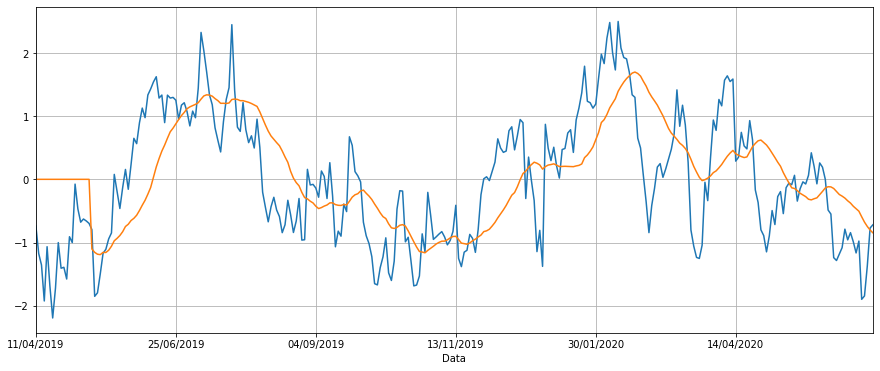

In [29]:
plt.figure(figsize=(15, 6))
dfres['resid'].plot()
dfres['mean'].plot()
plt.grid(True)

In [46]:
#data[['BBDC3', 'SANB11']].to_excel("datasets/BBDC3_SANB11_bug.xlsx")

In [62]:
y_symbol = 'AZUL4'
x_symbol = 'BBSE3'

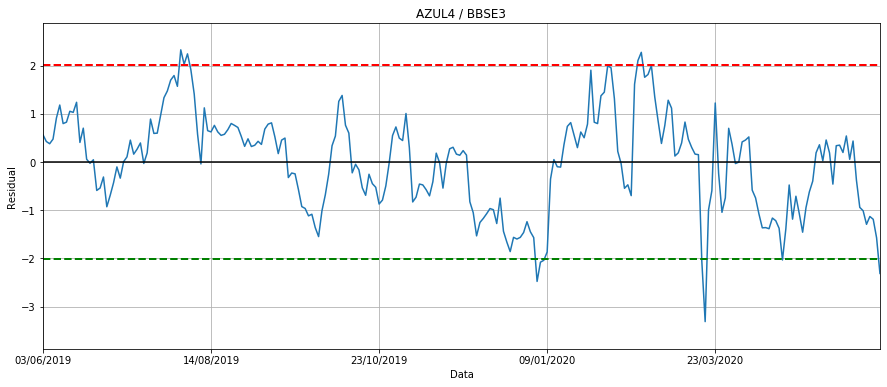

In [70]:
test = data[0:285]
show(test, y_symbol, x_symbol)

In [77]:
#data[[y_symbol, x_symbol]][284:][::-1].to_excel('datasets/test.xlsx')#03/06/2020

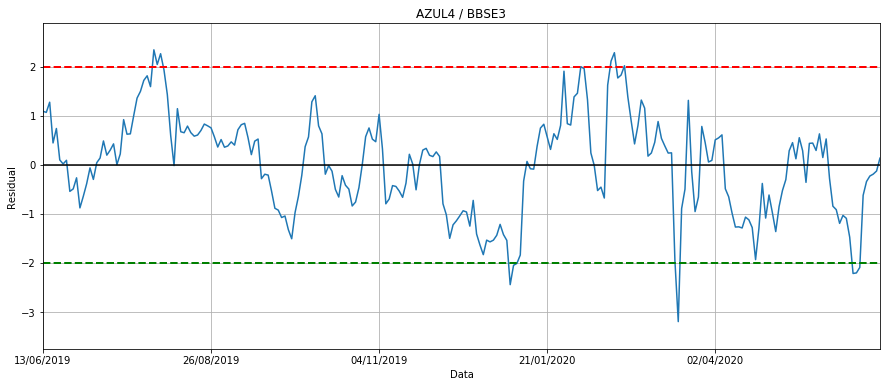

In [84]:
test = data[0:293]
show(test, y_symbol, x_symbol)

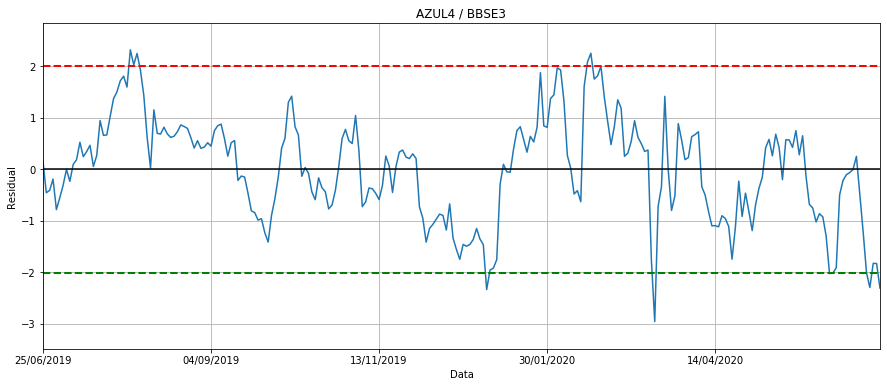

In [85]:
show(data, y_symbol, x_symbol)